# Soluções seção 7.8

## 7.47

In [8]:
import numpy as np
import control as ct
from numpy.linalg import det, inv, eig
from escrever import *
from IPython.display import display, Math
esc = escrever()

In [20]:
A = np.array([[0,-4],[1,0]]).T
B = np.array([[0,4]]).T
C = np.array([[1,0]])
D = np.array([[0]])
esc.sist(A,B,C,D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
p = [-2+2j, -2-2j]
K = ct.acker(A,B,p)
display(Math(esc.mat(K) ))

<IPython.core.display.Math object>

In [11]:
po = [-10+10j,-10-10j]
L = ct.acker(A.T,C.T,po).T
display(Math(esc.mat(L)))

<IPython.core.display.Math object>

In [13]:
Ac = A-B@K-L@C
Bc = L
Cc = -K
Dc = 0
comp = ct.ss(Ac,Bc,Cc,Dc)
ct.tf(comp)

TransferFunction(array([-216., -116.]), array([  1.,  24., 284.]))

In [28]:
Cs = ct.tf(comp)
Gs = ct.tf(ct.ss(A,B,C,D))
ct.margin(Cs*Gs)

(2.448275862068986, 54.822372599064295, 0.0, 0.9003869105076678)

Margem de ganho: 2.448  
Margem de fase: $54.8^\circ$

**Estudo**
- Explique o código
- Mantenha o sistema e refaça o projeto com outros polos.
- O que acontece com as margens? Faça uma correlação com as novas escolhas de pólos.
- Randomize o problema e refaça.

## 7.48

In [43]:
A = np.array([[-0.4, 0, -0.01],
              [1, 0, 0],
              [-1.4, 9.8, -0.02]])
B = np.array([[6.3, 0, 9.8]]).T
C = np.array([[1,0,0]])

In [37]:
# (a)
pma, _ = eig(A)
print('Polos MA =', pma)

Polos MA = [-0.65651269+0.j          0.11825634+0.36781655j  0.11825634-0.36781655j]


In [39]:
# (b)
det(ct.ctrb(A,B))

2451.332643199999

Sistema controlável

In [40]:
# (c)
p = [-1-1j,-1+1j,-2]
K = ct.acker(A,B,p)
print(K)

[[0.47064755 1.00004478 0.06274698]]


In [44]:
# (d)
from numpy import sqrt
po = [-8, -4+4j*sqrt(3), -4-4j*sqrt(3)]
L = ct.acker(A.T,C.T,po).T
print(L)

[[    15.58      ]
 [ -5223.48979592]
 [-12769.44      ]]


In [ ]:
# (e) - Não vimos estimador de ordem reduzida

In [52]:
# (f)
Ac = A-B@K-L@C
Bc = L
Cc = -K
Dc = 0
comp = ct.ss(Ac,Bc,Cc,Dc)
Cs = ct.tf(comp)
Cs

TransferFunction(array([6017.6348301 , 5652.03433284,  874.95229283]), array([1.00000000e+00, 1.95800000e+01, 3.81008818e+04, 2.08979592e+04]))

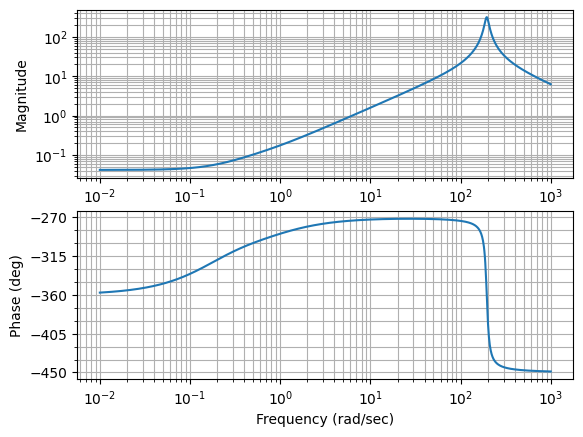

In [53]:
_, _, _ = ct.bode(Cs)

In [56]:
Gs = ct.tf(ct.ss(A,B,C,D))
ct.margin(Cs*Gs)

(382.8301299445272,
 7.9409245491294485,
 0.030752100449159624,
 275.0245663851597)

In [54]:
# (g) e (h) não fazer

**Estudo**
- Calcule o ganho de referência
- Simule resposta ao degrau unitário em malha fechada
- Calcule o sinal de controle
- Randomize o sistema e repita o projeto

## 7.49

Para simplificar, vamos considerar $\omega = \dot{\theta}$. Dessa forma o sistema fica:
$$
\begin{align*}
    \dot{\theta} &= \omega\\
    \dot{\omega} &= \theta + v + u\\
    \dot{v} &= \theta -v -u
\end{align*}
$$

In [59]:
# Matrizes de espaço de estado
A = np.array([[0,1,0],[1,0,1],[1,0,-1]])
B = np.array([[0,1,-1]]).T

In [60]:
# (a)
K = ct.acker(A,B,[-1,-1+1j*sqrt(3),-1-1j*sqrt(3)])
print(K)

[[7. 5. 3.]]


(b) Considerando $v$ conhecido, apenas as duas primeiras equações passam a ser relevantes. 

In [65]:
# (b)
A2 = A[:2,:2]
B2 = B[:2]
C2 = np.array([[1,0]])
L = ct.acker(A2.T,C2.T,[-2,-2]).T
print(L)

[[4.]
 [5.]]


O resto do problema requer uma análise mais detalhada sobre a equação que foi eliminada. Ficará para outra ocasião.

**Estudo**
- 

## 7.50

Equações de estado:
$$
\begin{align*}
    \dot{x}_1 &= x_2\\
    \dot{x}_2 &= -x_2+10u\\
    y &= x_1
\end{align*}
$$

In [66]:
# (a)
A = np.array([[0,1],[-1,0]])
B = np.array([[0,10]]).T
C = np.array([[1,0]])

In [67]:
# (b)
xi = 0.5
wn = 3
sigma = xi*wn
wd = wn*sqrt(1-xi**2)
s = -sigma+1j*wd
p = [s, np.conjugate(s)]
K = ct.acker(A,B,p)
print(K)

[[0.8 0.3]]


In [68]:
# (c)
xi = 0.5
wn1 = 15
sigma1 = xi*wn1
wd1 = wn1*sqrt(1-xi**2)
s1 = -sigma1+1j*wd1
p1 = [s1, np.conjugate(s1)]
L = ct.acker(A.T,C.T,p1).T
print(L)

[[ 15.]
 [224.]]


In [71]:
# (d)
Ac = A-B@K-L@C
Bc = L
Cc = K      # Positivo para podermos fazer o LGR negativo
Dc = 0
comp = ct.ss(Ac,Bc,Cc,Dc)
Cs = ct.ss2tf(comp)
Cs

TransferFunction(array([ 79.2, 174.7]), array([  1.,  18., 278.]))

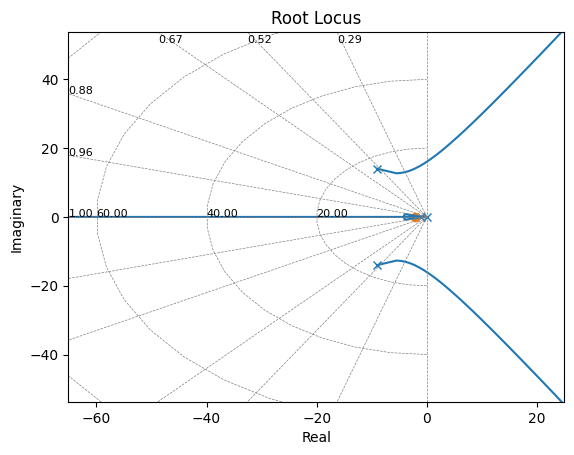

In [79]:
# (e)
Gs = ct.tf(1,np.poly([0,-1]))
_ = ct.rlocus(Cs*Gs)

**Estudo**
- Explique o código
- Varie um pouco o ganho do sistema e observe o que acontece. Correlacione com o LGR. 

## 7.51

Com a ação de controle proposta, a equação do sistema fica:
$$
    \ddot{x} = x - Kx
$$

A equação característica será: $s^2-1+K=0$. Esta equação é equivalente ao LGR de um sistema $\frac{1}{s^2-1}$ em malha aberta. 

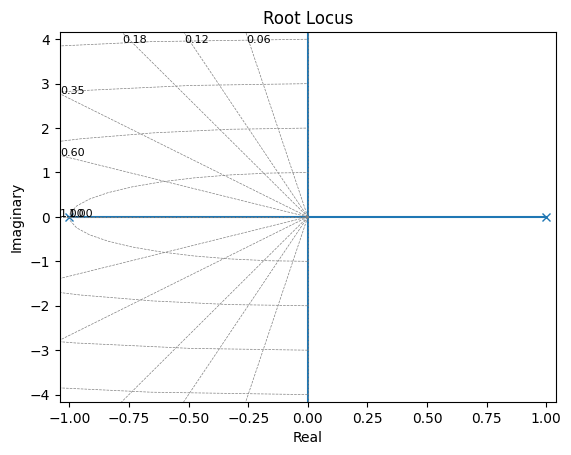

In [80]:
_ = ct.rlocus(ct.tf([1],[1,0,-1]))

(b) Com o controle proposta, a equação fica:
$$
    s^2\,X(s) = X(s) + K\frac{s+a}{s+10}X(s)
$$

Equação característica:
$$
\begin{align*}
(s^2-1)(s+10)-K(s+a)&=0\\
s^3+10s^2-(K+1)s-10-Ka&=0
\end{align*}
$$

In [102]:
from numpy import log,pi
import sympy as sp
tr = 2
Mp = 25e-2
xi = -log(Mp)/sqrt(pi**2+log(Mp)**2)
wn = 1.8/tr
sigma = xi*wn
wd = wn*sqrt(1-xi**2)
s = -sigma+1j*wd
b = sp.symbols('b')
# Precisamos deixar um dos pólos de MF livre, para equilibrar a equação de malha fechada
p = [s, np.conjugate(s), b]
s = sp.symbols('s')
alfa = sp.prod([s-a for a in p])
alfa = alfa.expand()
alfa.evalf(4)

-b*s**2 - 0.7267*b*s - 0.81*b + s**3 + 0.7267*s**2 + 0.81*s

In [103]:
a = sp.symbols('a')
K = sp.symbols('K')
alfa_mf = s**3+10*s**2-(K+1)*s-10-K*a
alfa_mf

-K*a + s**3 + 10*s**2 - s*(K + 1) - 10

In [109]:
eqs = {sp.Eq(alfa_mf.coeff(s,n),alfa.coeff(s,n)) for n in [0,1,2]}
sol = sp.solve(eqs)[0]
display(Math(sp.latex(sol)))

<IPython.core.display.Math object>

In [113]:
# Substituindo apenas o valor de a
lgr = alfa_mf.subs(a,sol[a])
lgr

-2.04841215553647*K + s**3 + 10*s**2 - s*(K + 1) - 10

In [120]:
lgr = lgr.expand().collect(K)
lgr

K*(-s - 2.04841215553647) + s**3 + 10*s**2 - s - 10

Vemos então que a equação característica equivale ao sistema em malha aberta
$$
    G(s) = \frac{−s−2.0484}{s^3+10s^2−s−10}
$$

**Estudo**
- Calcule o ganho de referência
- Simule resposta ao degrau unitário em malha fechada
- Calcule o sinal de controle
- Randomize o sistema e repita o projeto